<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [0]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


## Step 1: Data Loading (Local Machine JupyterNotebook)

In [0]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

In [0]:
#run if directories already created
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 1: Data Loading (Google Colab + GitHub)

In [1]:
#run for GitHub Colab
!git clone "https://github.com/BenjLiew/DL_Assg1.git"


Cloning into 'DL_Assg1'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 10088 (delta 27), reused 16 (delta 6), pack-reused 10039
Receiving objects: 100% (10088/10088), 476.40 MiB | 45.29 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Checking out files: 100% (10014/10014), done.


In [0]:
#GitHub Colab directory
# Directories for your training, validation and test splits
train_dir = '/content/DL_Assg1/train'
validation_dir = '/content/DL_Assg1/validation'
test_dir = '/content/DL_Assg1/test'

In [3]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 2:  Develop the Image Classification Models

### BaseModel 1

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))



model5.summary()



model5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history5 = model5.fit_generator(
      train_generator,
      steps_per_epoch=300, # batch: 25 * 300 = 7500 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80) # 25 * 80 = 2000 validation images


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)
Epoch 1/30
300/300 [==============================] - 311s 1s/step - loss: 2.0625 - acc: 0.2536 - val_loss: 1.8369 - val_acc: 0.3475
Epoch 2/30
300/300 [==============================] - 288s 961ms/step - loss: 1.8322 - acc: 0.3528 - val_loss: 1.6775 - val_acc: 0.4225
Epoch 3/30
300/300 [==============================] - 299s 996ms/step - loss: 1.7315 - acc: 0.3992 - val_loss: 1.6657 - val_acc: 0.4345
Epoch 4/30
300/300 [==============================] - 296s 986ms/step - loss: 1.6698 - acc: 0.4169 - val_loss: 1.5574 - val_acc: 0.4635
Epoch 5/30
300/300 [==============================] - 291s 971ms/step - loss: 1.6051 - acc: 0.4313 - val_loss: 1.4584 - val_acc: 0.4885
Epoch 6/30
300/300 [==============================] - 290s 968ms/step - loss: 1.5500 - acc: 0.4575 - val_loss: 1.4434 - val_acc: 0.4970
Epoch 7/30
300/300 [================

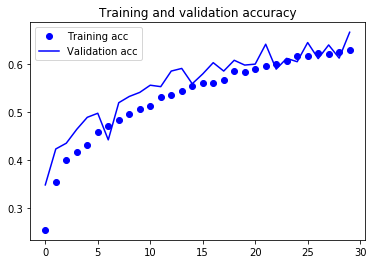

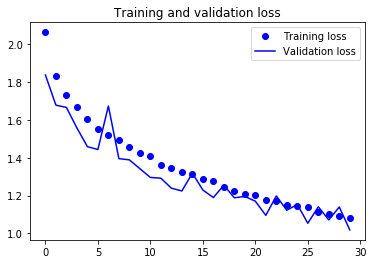

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs5 = range(len(acc5))

plt.plot(epochs5, acc5, 'bo', label='Training acc')
plt.plot(epochs5, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model5.save('food_model_5(BaseModel).h5')

### BaseModel + 'Adam'

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))



model6.summary()



model6.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history6 = model6.fit_generator(
      train_generator,
      steps_per_epoch=300, # batch: 25 * 300 = 7500 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80) # 25 * 80 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)
Epoch 1/30
300/300 [==============================] - 297s 990ms/step - loss: 2.0163 - acc: 0.2737 - val_loss: 1.8192 - val_acc: 0.3740
Epoch 2/30
300/300 [==============================] - 291s 969ms/step - loss: 1.7337 - acc: 0.3855 - val_loss: 1.5795 - val_acc: 0.4255
Epoch 3/30
300/300 [==============================] - 292s 972ms/step - loss: 1.5544 - acc: 0.4540 - val_loss: 1.4083 - val_acc: 0.5165
Epoch 4/30
300/300 [==============================] - 290s 968ms/step - loss: 1.4705 - acc: 0.4861 - val_loss: 1.6168 - val_acc: 0.4655
Epoch 5/30
300/300 [==============================] - 292s 973ms/step - loss: 1.3838 - acc: 0.5237 - val_loss: 1.2069 - val_acc: 0.5955
Epoch 6/30
300/300 [==============================] - 292s 973ms/step - loss: 1.3235 - acc: 0.5421 - val_loss: 1.1848 - val_acc: 0.5980
Epoch 7/30
300/300 [=============

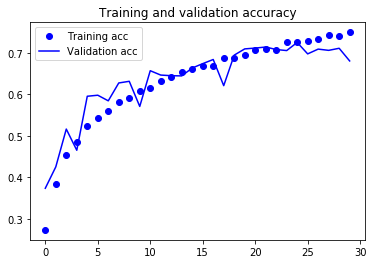

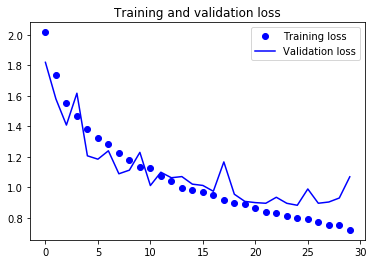

Found 500 images belonging to 10 classes.
test acc: 0.686


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs6 = range(len(acc6))

plt.plot(epochs6, acc6, 'bo', label='Training acc')
plt.plot(epochs6, val_acc6, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model6.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model6.save('food_model_6(BaseModel+Adam).h5')

### BaseModel + Adam + >Epoch + Batch=10

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dense(512, activation='relu'))
model8.add(layers.Dense(10, activation='softmax'))



model8.summary()



model8.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history8 = model8.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/50
750/750 [==============================] - 75s 100ms/step - loss: 2.0813 - acc: 0.2384 - val_loss: 1.9998 - val_acc: 0.2950
Epoch 2/50
750/750 [==============================] - 74s 99ms/step - loss: 1.9180 - acc: 0.3124 - val_loss: 1.6696 - val_acc: 0.4050
Epoch 3/50
750/750 [==============================] - 74s 99ms/step - loss: 1.7845 - acc: 0.3731 - val_loss: 1.6195 - val_acc: 0.4385
Epoch 4/50
750/750 [==============================] - 74s 99ms/step - loss: 1.6292 - acc: 0.4205 - val_loss: 1.4782 - val_acc: 0.4925
Epoch 5/50
750/750 [==============================] - 74s 99ms/step - loss: 1.5230 - acc: 0.4695 - val_loss: 1.4190 - val_acc: 0.5150
Epoch 6/50
750/750 [==============================] - 74s 98ms/step - loss: 1.4445 - acc: 0.4932 - val_loss: 1.3194 - val_acc: 0.5420
Epoch 7/50
750/750 [========================

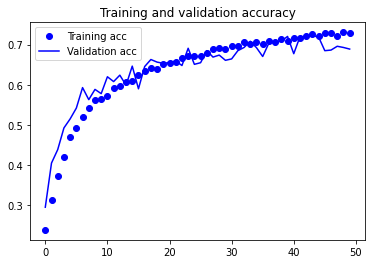

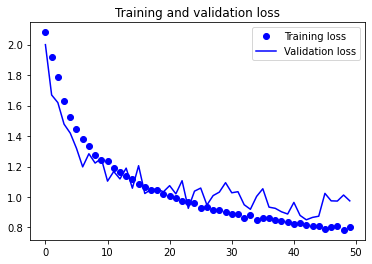

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.6759999990463257


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc8 = history8.history['acc']
val_acc8 = history8.history['val_acc']
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']

epochs8 = range(len(acc8))

plt.plot(epochs8, acc8, 'bo', label='Training acc')
plt.plot(epochs8, val_acc8, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs8, loss8, 'bo', label='Training loss')
plt.plot(epochs8, val_loss8, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model8.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model8.save(model_path+'food_model_6(BaseModel+Adam+50epoch+batch10).h5')

### BaseModel (above + 120 epochs)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model11 = models.Sequential()
model11.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(128, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(128, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Flatten())
model11.add(layers.Dense(512, activation='relu'))
model11.add(layers.Dense(10, activation='softmax'))



model11.summary()



model11.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history11 = model11.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 244s 325ms/step - loss: 2.0704 - acc: 0.2385 - val_loss: 1.9311 - val_acc: 0.3030
Epoch 2/120
750/750 [==============================] - 245s 327ms/step - loss: 1.8982 - acc: 0.3131 - val_loss: 1.6766 - val_acc: 0.4170
Epoch 3/120
750/750 [==============================] - 246s 328ms/step - loss: 1.7263 - acc: 0.3887 - val_loss: 1.6052 - val_acc: 0.4275
Epoch 4/120
750/750 [==============================] - 249s 333ms/step - loss: 1.5913 - acc: 0.4368 - val_loss: 1.3773 - val_acc: 0.5125
Epoch 5/120
750/750 [==============================] - 244s 326ms/step - loss: 1.4726 - acc: 0.4844 - val_loss: 1.2708 - val_acc: 0.5605
Epoch 6/120
750/750 [==============================] - 245s 327ms/step - loss: 1.3911 - acc: 0.5115 - val_loss: 1.2167 - val_acc: 0.5870
Epoch 7/120
750/750 [======

Epoch 37/120
750/750 [==============================] - 245s 326ms/step - loss: 0.8275 - acc: 0.7183 - val_loss: 0.9658 - val_acc: 0.6855
Epoch 38/120
750/750 [==============================] - 243s 324ms/step - loss: 0.8377 - acc: 0.7157 - val_loss: 0.9058 - val_acc: 0.7105
Epoch 39/120
750/750 [==============================] - 244s 325ms/step - loss: 0.8446 - acc: 0.7084 - val_loss: 0.9623 - val_acc: 0.7030
Epoch 40/120
750/750 [==============================] - 243s 324ms/step - loss: 0.8409 - acc: 0.7137 - val_loss: 0.9677 - val_acc: 0.7035
Epoch 41/120
750/750 [==============================] - 245s 326ms/step - loss: 0.8328 - acc: 0.7171 - val_loss: 0.9309 - val_acc: 0.7050
Epoch 42/120
750/750 [==============================] - 243s 325ms/step - loss: 0.8135 - acc: 0.7223 - val_loss: 1.0190 - val_acc: 0.6805
Epoch 43/120
750/750 [==============================] - 243s 324ms/step - loss: 0.8090 - acc: 0.7195 - val_loss: 0.9067 - val_acc: 0.7040
Epoch 44/120
750/750 [============

750/750 [==============================] - 243s 324ms/step - loss: 0.6828 - acc: 0.7736 - val_loss: 0.8987 - val_acc: 0.7250
Epoch 110/120
750/750 [==============================] - 243s 324ms/step - loss: 0.6726 - acc: 0.7709 - val_loss: 0.9224 - val_acc: 0.7415
Epoch 111/120
750/750 [==============================] - 254s 339ms/step - loss: 0.6611 - acc: 0.7787 - val_loss: 0.8569 - val_acc: 0.7395
Epoch 112/120
750/750 [==============================] - 252s 336ms/step - loss: 0.6682 - acc: 0.7797 - val_loss: 1.0160 - val_acc: 0.7200
Epoch 113/120
750/750 [==============================] - 243s 325ms/step - loss: 0.6831 - acc: 0.7721 - val_loss: 0.9958 - val_acc: 0.7175
Epoch 114/120
750/750 [==============================] - 243s 324ms/step - loss: 0.6683 - acc: 0.7785 - val_loss: 0.9707 - val_acc: 0.7155
Epoch 115/120
750/750 [==============================] - 244s 325ms/step - loss: 0.6876 - acc: 0.7679 - val_loss: 0.9096 - val_acc: 0.7315
Epoch 116/120
750/750 [==================

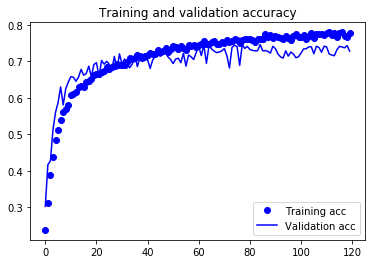

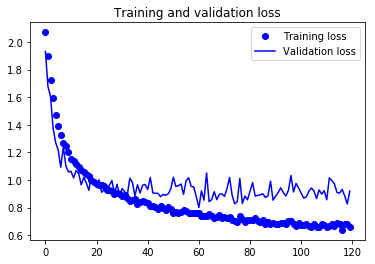

Found 500 images belonging to 10 classes.
test acc: 0.704


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs11 = range(len(acc11))

plt.plot(epochs11, acc11, 'bo', label='Training acc')
plt.plot(epochs11, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model11.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model11.save('food_model_8(Final_BaseModel_v1).h5')

### BaseModel (above + 1/2 nodes)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(128, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/120
750/750 [==============================] - 86s 114ms/step - loss: 2.0766 - acc: 0.2376 - val_loss: 1.8604 - val_acc: 0.3400
Epoch 2/120
750/750 [==============================] - 85s 114ms/step - loss: 1.7959 - acc: 0.3572 - val_loss: 1.5522 - val_acc: 0.4650
Epoch 3/120
750/750 [==============================] - 85s 114ms/step - loss: 1.6734 - acc: 0.4025 - val_loss: 1.5031 - val_acc: 0.4615
Epoch 4/120
750/750 [==============================] - 85s 114ms/step - loss: 1.5817 - acc: 0.4451 - val_loss: 1.4204 - val_acc: 0.5195
Epoch 5/120
750/750 [==============================] - 85s 114ms/step - loss: 1.5003 - acc: 0.4787 - val_loss: 1.3599 - val_acc: 0.5260
Epoch 6/120
750/750 [==============================] - 86s 114ms/step - loss: 1.4067 - acc: 0

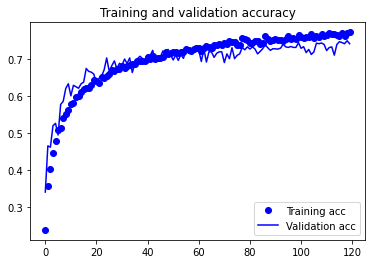

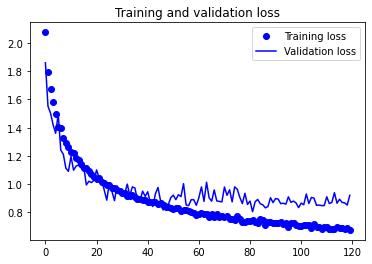

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7300000190734863


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base).h5')
model10.save('food_model(Base)_backup.h5')

### BaseModel - testing (above + lr=0.0001)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model12 = models.Sequential()
model12.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(32, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Flatten())
model12.add(layers.Dense(128, activation='relu'))
model12.add(layers.Dense(10, activation='softmax'))



model12.summary()



model12.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history12 = model12.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 156s 208ms/step - loss: 2.1528 - acc: 0.2091 - val_loss: 1.9288 - val_acc: 0.3460
Epoch 2/120
750/750 [==============================] - 153s 204ms/step - loss: 1.8348 - acc: 0.3613 - val_loss: 1.8265 - val_acc: 0.3830
Epoch 3/120
750/750 [==============================] - 154s 205ms/step - loss: 1.7199 - acc: 0.3952 - val_loss: 1.5907 - val_acc: 0.4570
Epoch 4/120
750/750 [==============================] - 155s 206ms/step - loss: 1.6510 - acc: 0.4273 - val_loss: 1.5566 - val_acc: 0.4565
Epoch 5/120
750/750 [==============================] - 155s 207ms/step - loss: 1.6067 - acc: 0.4433 - val_loss: 1.5478 - val_acc: 0.4660
Epoch 6/120
750/750 [==============================] - 155s 206ms/step - loss: 1.5753 - acc: 0.4537 - val_loss: 1.6314 - val_acc: 0.4495
Epoch 7/120
750/750 [======

Epoch 37/120
750/750 [==============================] - 154s 205ms/step - loss: 1.1047 - acc: 0.6231 - val_loss: 1.1313 - val_acc: 0.6210
Epoch 38/120
750/750 [==============================] - 154s 206ms/step - loss: 1.0908 - acc: 0.6263 - val_loss: 1.0766 - val_acc: 0.6375
Epoch 39/120
750/750 [==============================] - 154s 205ms/step - loss: 1.0885 - acc: 0.6369 - val_loss: 1.1483 - val_acc: 0.6205
Epoch 40/120
750/750 [==============================] - 155s 206ms/step - loss: 1.0721 - acc: 0.6327 - val_loss: 1.1063 - val_acc: 0.6245
Epoch 41/120
750/750 [==============================] - 156s 208ms/step - loss: 1.0598 - acc: 0.6311 - val_loss: 1.1305 - val_acc: 0.6265
Epoch 42/120
750/750 [==============================] - 154s 206ms/step - loss: 1.0558 - acc: 0.6413 - val_loss: 1.0670 - val_acc: 0.6490
Epoch 43/120
750/750 [==============================] - 155s 207ms/step - loss: 1.0443 - acc: 0.6376 - val_loss: 1.0887 - val_acc: 0.6265
Epoch 44/120
750/750 [============

750/750 [==============================] - 154s 205ms/step - loss: 0.7476 - acc: 0.7432 - val_loss: 0.9622 - val_acc: 0.6880
Epoch 110/120
750/750 [==============================] - 154s 205ms/step - loss: 0.7324 - acc: 0.7485 - val_loss: 0.9130 - val_acc: 0.7070
Epoch 111/120
750/750 [==============================] - 154s 205ms/step - loss: 0.7339 - acc: 0.7472 - val_loss: 1.0103 - val_acc: 0.6880
Epoch 112/120
750/750 [==============================] - 157s 209ms/step - loss: 0.7357 - acc: 0.7451 - val_loss: 0.9829 - val_acc: 0.6925
Epoch 113/120
750/750 [==============================] - 155s 207ms/step - loss: 0.7356 - acc: 0.7536 - val_loss: 0.9278 - val_acc: 0.7100
Epoch 114/120
750/750 [==============================] - 153s 204ms/step - loss: 0.7364 - acc: 0.7457 - val_loss: 1.0831 - val_acc: 0.6640
Epoch 115/120
750/750 [==============================] - 154s 205ms/step - loss: 0.7197 - acc: 0.7519 - val_loss: 0.9900 - val_acc: 0.6860
Epoch 116/120
750/750 [==================

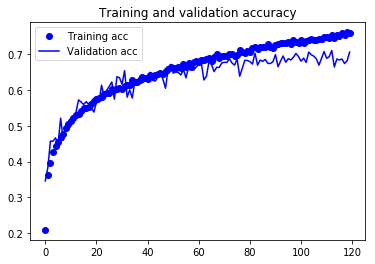

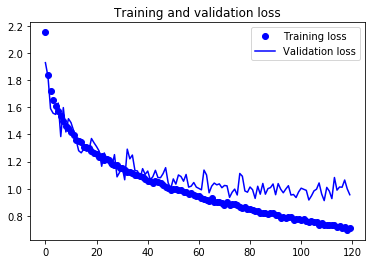

Found 500 images belonging to 10 classes.
test acc: 0.682


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs12 = range(len(acc12))

plt.plot(epochs12, acc12, 'bo', label='Training acc')
plt.plot(epochs12, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs12, loss12, 'bo', label='Training loss')
plt.plot(epochs12, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model12.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model12.save('food_model_8(Final_BaseModel_v2).h5')

### BaseModel - testing (above + lr=1e-4)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model13 = models.Sequential()
model13.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(32, (3, 3), activation='relu'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(64, (3, 3), activation='relu'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(64, (3, 3), activation='relu'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Flatten())
model13.add(layers.Dense(128, activation='relu'))
model13.add(layers.Dense(10, activation='softmax'))



model13.summary()



model13.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history13 = model13.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 74s 98ms/step - loss: 2.0980 - acc: 0.2325 - val_loss: 1.8468 - val_acc: 0.3550
Epoch 2/120
750/750 [==============================] - 73s 98ms/step - loss: 1.8485 - acc: 0.3465 - val_loss: 1.7557 - val_acc: 0.3965
Epoch 3/120
750/750 [==============================] - 73s 98ms/step - loss: 1.7302 - acc: 0.3973 - val_loss: 1.6541 - val_acc: 0.4220
Epoch 4/120
750/750 [==============================] - 73s 97ms/step - loss: 1.6519 - acc: 0.4221 - val_loss: 1.5748 - val_acc: 0.4490
Epoch 5/120
750/750 [==============================] - 73s 98ms/step - loss: 1.6054 - acc: 0.4329 - val_loss: 1.4317 - val_acc: 0.4975
Epoch 6/120
750/750 [==============================] - 73s 97ms/step - loss: 1.5753 - acc: 0.4500 - val_loss: 1.4458 - val_acc: 0.4910
Epoch 7/120
750/750 [==================

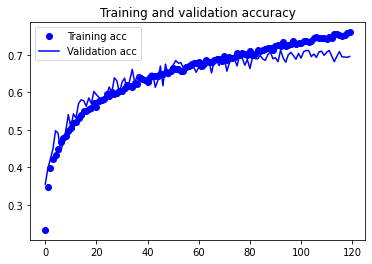

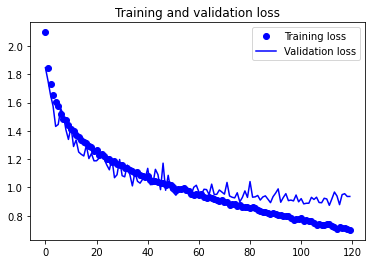

Found 500 images belonging to 10 classes.
test acc: 0.6779999732971191


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc13 = history13.history['acc']
val_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
val_loss13 = history13.history['val_loss']

epochs13 = range(len(acc13))

plt.plot(epochs13, acc13, 'bo', label='Training acc')
plt.plot(epochs13, val_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs13, loss13, 'bo', label='Training loss')
plt.plot(epochs13, val_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model13.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model13.save(model_path+'food_model_8(BaseModel13).h5')

### BaseModel (above + 1/2 nodes) + Dense32

In [5]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [6]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/120
750/750 [==============================] - 74s 99ms/step - loss: 2.0569 - acc: 0.2512 - val_loss: 2.0112 - val_acc: 0.2705
Epoch 2/120
750/750 [==============================] - 74s 99ms/step - loss: 1.8314 - acc: 0.3512 - val_loss: 1.5884 - val_acc: 0.4560
Epoch 3/120
750/750 [==============================] - 74s 99ms/step - loss: 1.6721 - acc: 0.4149 - val_loss: 1.5594 - val_acc: 0.4510
Epoch 4/120
750/750 [==============================] - 72s 96ms/step - loss: 1.5540 - acc: 0.4548 - val_loss: 1.4332 - val_acc: 0.5020
Epoch 5/120
750/750 [==============================] - 73s 98ms/step - loss: 1.4760 - acc: 0.4793 - val_loss: 1.3728 - val_acc: 0.5205
Epoch 6/120
750/750 [==============================] - 75s 100ms/step - loss: 1.4086 - acc: 0.5083

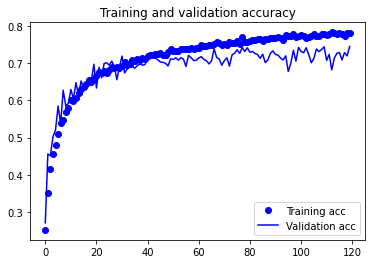

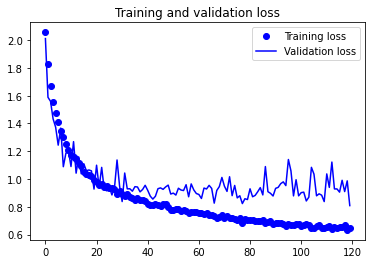

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7480000257492065


In [7]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base)Dense32.h5')
model10.save('food_model(Base)Dense32_backup.h5')

### BaseModel (above + 1/2 nodes) + Dense32 + Remove 2 MP

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(32, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/120
750/750 [==============================] - 70s 93ms/step - loss: 2.2331 - acc: 0.1537 - val_loss: 2.1583 - val_acc: 0.1690
Epoch 2/120
750/750 [==============================] - 70s 93ms/step - loss: 2.1407 - acc: 0.1873 - val_loss: 1.9720 - val_acc: 0.2615
Epoch 3/120
750/750 [==============================] - 69s 92ms/step - loss: 1.8985 - acc: 0.2941 - val_loss: 1.7759 - val_acc: 0.3400
Epoch 4/120
750/750 [==============================] - 69s 91ms/step - loss: 1.7583 - acc: 0.3643 - val_loss: 1.6187 - val_acc: 0.3985
Epoch 5/120
750/750 [==============================] - 68s 91ms/step - loss: 1.6534 - acc: 0.4071 - val_loss: 1.6374 - val_acc: 0.3995
Epoch 6/120
750/750 [==============================] - 68s 91ms/step - loss: 1.5666 - acc: 0.4400 

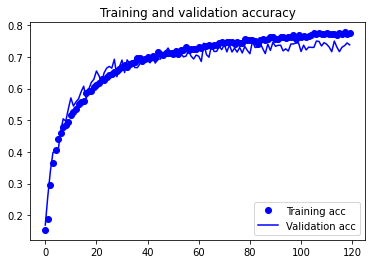

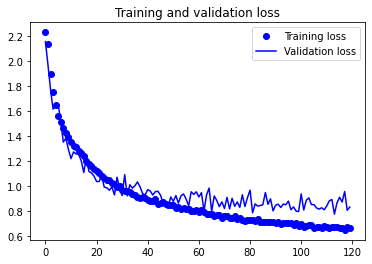

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7459999918937683


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base)Dense32_v2.h5')
model10.save('food_model(Base)Dense32_v2backup.h5')

### BaseModel - testing (above + Conv2D 128)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(128, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)       

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 81s 107ms/step - loss: 2.1573 - acc: 0.1987 - val_loss: 1.9848 - val_acc: 0.2700
Epoch 2/120
750/750 [==============================] - 81s 108ms/step - loss: 1.9533 - acc: 0.2945 - val_loss: 1.8809 - val_acc: 0.3265
Epoch 3/120
750/750 [==============================] - 80s 107ms/step - loss: 1.8162 - acc: 0.3532 - val_loss: 1.5601 - val_acc: 0.4615
Epoch 4/120
750/750 [==============================] - 82s 109ms/step - loss: 1.6805 - acc: 0.4183 - val_loss: 1.6321 - val_acc: 0.4235
Epoch 5/120
750/750 [==============================] - 82s 109ms/step - loss: 1.5761 - acc: 0.4531 - val_loss: 1.6490 - val_acc: 0.4385
Epoch 6/120
750/750 [==============================] - 82s 110ms/step - loss: 1.5176 - acc: 0.4720 - val_loss: 1.3591 - val_acc: 0.5165
Epoch 7/120
750/750 [============

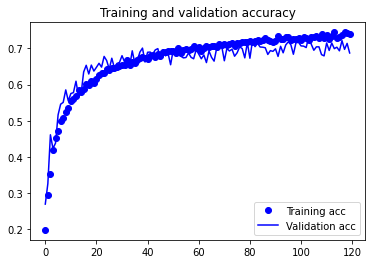

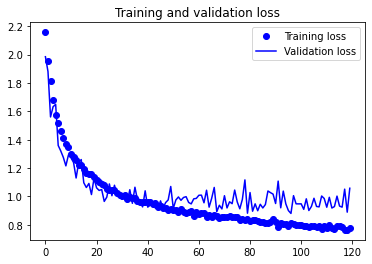

Found 500 images belonging to 10 classes.
test acc: 0.6759999990463257


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base+Conv2D128).h5')
model10.save('food_model(Base+Conv2D128)_backup.h5')

### BaseModel (Add Conv2D 128 + double Dense 256) 

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(256, activation='relu'))
model10.add(layers.Dense(256, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 85s 113ms/step - loss: 2.2463 - acc: 0.1409 - val_loss: 2.0220 - val_acc: 0.2210
Epoch 2/120
750/750 [==============================] - 84s 112ms/step - loss: 1.9986 - acc: 0.2729 - val_loss: 1.8086 - val_acc: 0.3620
Epoch 3/120
750/750 [==============================] - 84s 112ms/step - loss: 1.8496 - acc: 0.3396 - val_loss: 1.6975 - val_acc: 0.3900
Epoch 4/120
750/750 [==============================] - 83s 110ms/step - loss: 1.7316 - acc: 0.3853 - val_loss: 1.5653 - val_acc: 0.4310
Epoch 5/120
750/750 [==============================] - 82s 110ms/step - loss: 1.6411 - acc: 0.4160 - val_loss: 1.5038 - val_acc: 0.4675
Epoch 6/120
750/750 [==============================] - 82s 110ms/step - loss: 1.5892 - acc: 0.4399 - val_loss: 1.5034 - val_acc: 0.4685
Epoch 7/120
750/750 [============

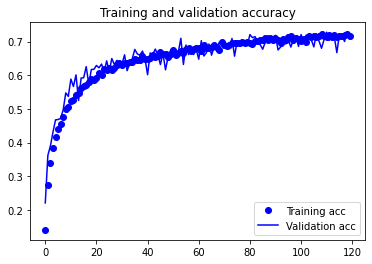

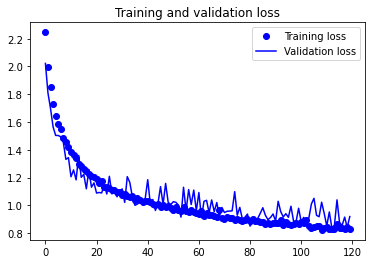

Found 500 images belonging to 10 classes.
test acc: 0.6919999718666077


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base)v2.h5')
model10.save('food_model(Base)v2_backup.h5')

In [0]:
model10 = models.load_model(model_path+'food_model(Base)v2.h5')
model10.summary()

model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [0]:
#More epochs (total 200)

# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=80,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
750/750 [==============================] - 70s 94ms/step - loss: 0.8510 - acc: 0.7192 - val_loss: 0.9650 - val_acc: 0.6955
Epoch 2/80
750/750 [==============================] - 70s 94ms/step - loss: 0.8196 - acc: 0.7232 - val_loss: 0.9006 - val_acc: 0.7170
Epoch 3/80
750/750 [==============================] - 70s 93ms/step - loss: 0.8332 - acc: 0.7175 - val_loss: 0.9228 - val_acc: 0.7050
Epoch 4/80
750/750 [==============================] - 71s 94ms/step - loss: 0.8414 - acc: 0.7119 - val_loss: 0.9485 - val_acc: 0.7120
Epoch 5/80
750/750 [==============================] - 70s 94ms/step - loss: 0.8324 - acc: 0.7140 - val_loss: 0.8807 - val_acc: 0.7290
Epoch 6/80
750/750 [==============================] - 70s 93ms/step - loss: 0.8195 - acc: 0.7316 - val_

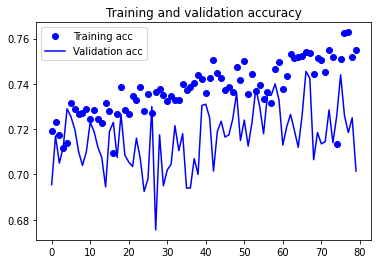

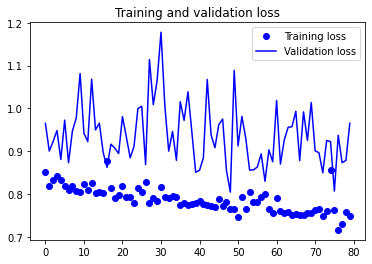

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.6980000138282776


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base)v2_1.h5')
model10.save('food_model(Base)v2_1backup.h5')

### BaseModel (Add Conv2D 128 + double Dense 32) 

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model11 = models.Sequential()
model11.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(32, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(128, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Flatten())
model11.add(layers.Dense(32, activation='relu'))
model11.add(layers.Dense(32, activation='relu'))
model11.add(layers.Dense(10, activation='softmax'))



model11.summary()



model11.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 64)       

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history11 = model11.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 87s 116ms/step - loss: 2.2752 - acc: 0.1191 - val_loss: 2.1488 - val_acc: 0.2480
Epoch 2/120
750/750 [==============================] - 87s 116ms/step - loss: 2.1086 - acc: 0.2323 - val_loss: 1.9590 - val_acc: 0.2960
Epoch 3/120
750/750 [==============================] - 87s 116ms/step - loss: 1.9756 - acc: 0.2927 - val_loss: 1.9008 - val_acc: 0.3330
Epoch 4/120
750/750 [==============================] - 86s 115ms/step - loss: 1.8761 - acc: 0.3375 - val_loss: 1.7135 - val_acc: 0.3720
Epoch 5/120
750/750 [==============================] - 87s 116ms/step - loss: 1.7820 - acc: 0.3664 - val_loss: 1.6283 - val_acc: 0.4235
Epoch 6/120
750/750 [==============================] - 87s 116ms/step - loss: 1.6897 - acc: 0.4012 - val_loss: 1.5659 - val_acc: 0.4465
Epoch 7/120
750/750 [============

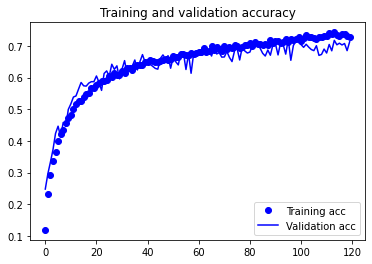

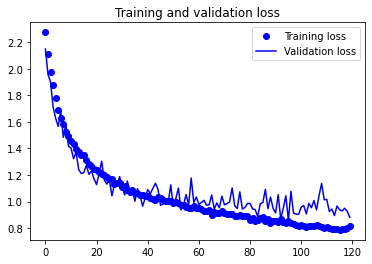

Found 500 images belonging to 10 classes.
test acc: 0.722000002861023


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs11 = range(len(acc11))

plt.plot(epochs11, acc11, 'bo', label='Training acc')
plt.plot(epochs11, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model11.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model11.save(model_path+'food_model(Base)v3.h5')
model11.save('food_model(Base)v3_backup.h5')

In [0]:
model11 = models.load_model(model_path+'food_model(Base)v3.h5')
model11.summary()

model11.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 64)       

In [0]:
#More epoch (120+30)

# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

history11 = model11.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/30
750/750 [==============================] - 70s 93ms/step - loss: 0.7891 - acc: 0.7415 - val_loss: 1.0176 - val_acc: 0.6980
Epoch 2/30
750/750 [==============================] - 71s 94ms/step - loss: 0.8136 - acc: 0.7312 - val_loss: 0.9288 - val_acc: 0.7100
Epoch 3/30
750/750 [==============================] - 71s 95ms/step - loss: 0.7841 - acc: 0.7408 - val_loss: 0.9756 - val_acc: 0.6960
Epoch 4/30
750/750 [==============================] - 71s 95ms/step - loss: 0.7774 - acc: 0.7403 - val_loss: 1.0152 - val_acc: 0.6780
Epoch 5/30
750/750 [==============================] - 71s 94ms/step - loss: 0.7933 - acc: 0.7319 - val_loss: 1.0364 - val_acc: 0.6955
Epoch 6/30
750/750 [==============================] - 71s 95ms/step - loss: 0.8105 - acc: 0.7335 - val_loss: 1.0527 - val_acc: 0.6655
Epoch 7/30
750/750 [=========================

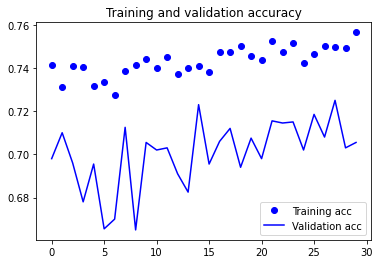

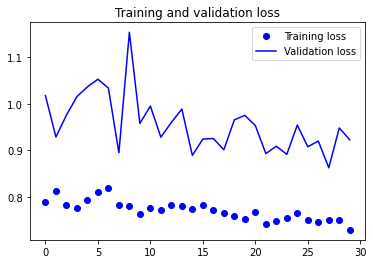

Found 500 images belonging to 10 classes.
test acc: 0.7059999704360962


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs11 = range(len(acc11))

plt.plot(epochs11, acc11, 'bo', label='Training acc')
plt.plot(epochs11, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model11.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model11.save(model_path+'food_model(Base)v3_1.h5')
model11.save('food_model(Base)v3_1backup.h5')

In [0]:
#More epoch (150+25)
history11 = model11.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images

Epoch 1/25
750/750 [==============================] - 70s 93ms/step - loss: 0.7668 - acc: 0.7457 - val_loss: 0.9039 - val_acc: 0.7120
Epoch 2/25
750/750 [==============================] - 70s 93ms/step - loss: 0.7383 - acc: 0.7595 - val_loss: 0.9531 - val_acc: 0.7145
Epoch 3/25
750/750 [==============================] - 70s 93ms/step - loss: 0.7427 - acc: 0.7497 - val_loss: 0.9159 - val_acc: 0.7190
Epoch 4/25
750/750 [==============================] - 69s 93ms/step - loss: 0.7406 - acc: 0.7528 - val_loss: 0.8730 - val_acc: 0.7245
Epoch 5/25
750/750 [==============================] - 70s 93ms/step - loss: 0.7434 - acc: 0.7499 - val_loss: 1.1216 - val_acc: 0.6815
Epoch 6/25
750/750 [==============================] - 69s 92ms/step - loss: 0.7331 - acc: 0.7517 - val_loss: 0.8665 - val_acc: 0.7295
Epoch 7/25
750/750 [==============================] - 69s 92ms/step - loss: 0.7368 - acc: 0.7517 - val_loss: 0.9064 - val_acc: 0.7305
Epoch 8/25
750/750 [==============================] - 69s 92ms

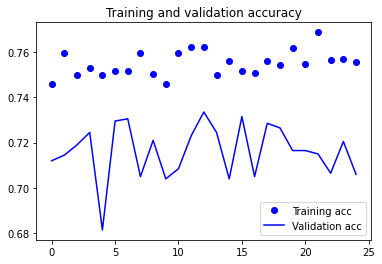

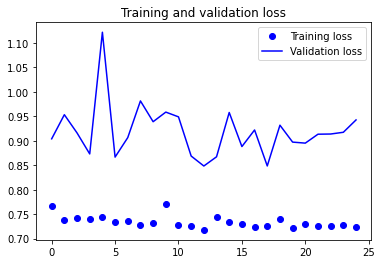

Found 500 images belonging to 10 classes.
test acc: 0.7020000219345093


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs11 = range(len(acc11))

plt.plot(epochs11, acc11, 'bo', label='Training acc')
plt.plot(epochs11, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model11.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model11.save(model_path+'food_model(Base)v3_2.h5')
model11.save('food_model(Base)v3_2backup.h5')

In [0]:
#More epoch (175+25)
history11 = model11.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images

Epoch 1/25
750/750 [==============================] - 70s 94ms/step - loss: 0.7263 - acc: 0.7572 - val_loss: 0.9303 - val_acc: 0.7195
Epoch 2/25
750/750 [==============================] - 70s 93ms/step - loss: 0.7141 - acc: 0.7619 - val_loss: 0.9060 - val_acc: 0.7240
Epoch 3/25
750/750 [==============================] - 70s 93ms/step - loss: 0.6983 - acc: 0.7699 - val_loss: 0.8721 - val_acc: 0.7270
Epoch 4/25
750/750 [==============================] - 70s 93ms/step - loss: 0.7280 - acc: 0.7593 - val_loss: 0.9252 - val_acc: 0.7115
Epoch 5/25
750/750 [==============================] - 70s 94ms/step - loss: 0.7146 - acc: 0.7577 - val_loss: 0.8936 - val_acc: 0.7195
Epoch 6/25
750/750 [==============================] - 69s 92ms/step - loss: 0.7015 - acc: 0.7696 - val_loss: 0.8841 - val_acc: 0.7205
Epoch 7/25
750/750 [==============================] - 70s 93ms/step - loss: 0.6994 - acc: 0.7663 - val_loss: 0.9268 - val_acc: 0.7235
Epoch 8/25
750/750 [==============================] - 70s 93ms

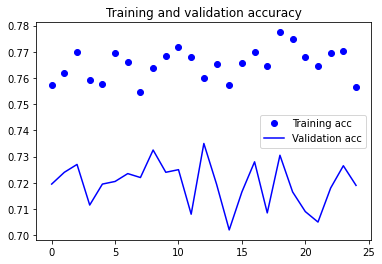

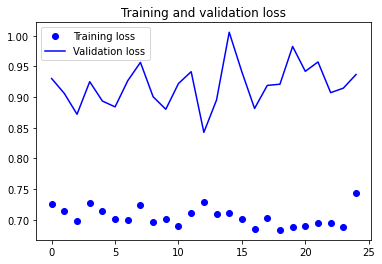

Found 500 images belonging to 10 classes.
test acc: 0.7459999918937683


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs11 = range(len(acc11))

plt.plot(epochs11, acc11, 'bo', label='Training acc')
plt.plot(epochs11, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model11.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model11.save(model_path+'food_model(Base)v3_3.h5')
model11.save('food_model(Base)v3_3backup.h5')

### BaseModel (above + 1/2 nodes) EXPERIMENTAL + Conv2D 128 + Dense 64

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/120
750/750 [==============================] - 71s 95ms/step - loss: 2.1368 - acc: 0.2139 - val_loss: 1.9831 - val_acc: 0.2755
Epoch 2/120
750/750 [==============================] - 71s 94ms/step - loss: 1.9408 - acc: 0.2980 - val_loss: 1.8025 - val_acc: 0.3590
Epoch 3/120
750/750 [==============================] - 71s 94ms/step - loss: 1.8125 - acc: 0.3604 - val_loss: 1.6378 - val_acc: 0.4270
Epoch 4/120
750/750 [==============================] - 71s 95ms/step - loss: 1.6925 - acc: 0.3997 - val_loss: 1.6056 - val_acc: 0.4335
Epoch 5/120
750/750 [==============================] - 70s 94ms/step - loss: 1.6091 - acc: 0.4316 - val_loss: 1.3962 - val_acc: 0.5070
Epoch 6/120
750/750 [==============================] - 70s 94ms/step - loss: 1.5268 - acc: 0.4711 

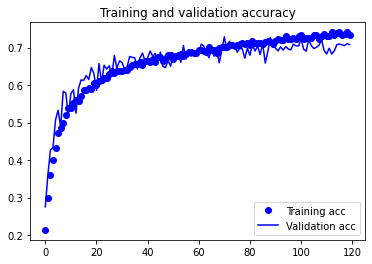

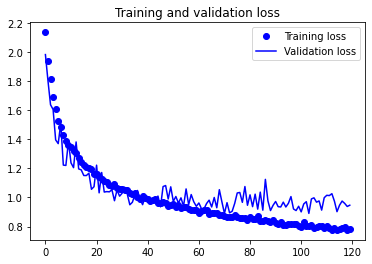

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7160000205039978


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base_test1).h5')
model10.save('food_model(Base_test1)_backup.h5')

### BaseModel (above + 1/2 nodes) EXPERIMENTAL_ABOVE + remove 2 MP

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 144, 144, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 128)      

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 80s 107ms/step - loss: 2.1530 - acc: 0.1967 - val_loss: 1.9822 - val_acc: 0.2665
Epoch 2/120
750/750 [==============================] - 78s 104ms/step - loss: 1.9507 - acc: 0.2976 - val_loss: 1.7789 - val_acc: 0.3560
Epoch 3/120
750/750 [==============================] - 79s 106ms/step - loss: 1.8076 - acc: 0.3553 - val_loss: 1.6588 - val_acc: 0.4245
Epoch 4/120
750/750 [==============================] - 81s 108ms/step - loss: 1.7024 - acc: 0.3985 - val_loss: 1.5955 - val_acc: 0.4375
Epoch 5/120
750/750 [==============================] - 79s 105ms/step - loss: 1.6212 - acc: 0.4313 - val_loss: 1.6379 - val_acc: 0.4575
Epoch 6/120
750/750 [==============================] - 78s 105ms/step - loss: 1.5388 - acc: 0.4621 - val_loss: 1.5498 - val_acc: 0.4630
Epoch 7/120
750/750 [============

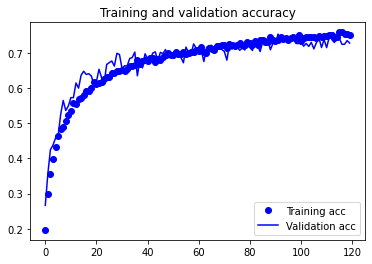

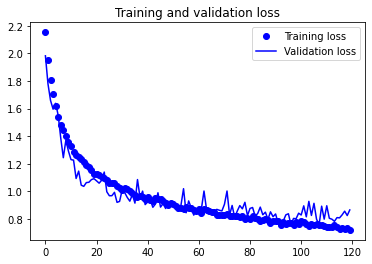

Found 500 images belonging to 10 classes.
test acc: 0.7200000286102295


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'food_model(Base_test2).h5')
model10.save('food_model(Base_test2)_backup.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [0]:
# Model #1
model.load_weights('food_model_1.h5')




In [0]:
# Model #2
model.load_weights('food_model_2.h5')




In [0]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [0]:
# Load the model
model.load_weights('food_model_best.h5')

In [0]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [0]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [0]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)